# TALLER 2

Integrantes:
Natalia Barraza, Cristian Marin

## Cargado de Datos

In [1]:
import pandas as pd
train_df = pd.read_csv('house_price_train.csv')
test_df = pd.read_csv('house_price_test.csv')

### PARTE 1


#### La pregunta de investigación que escogimos es la número 1: 

**Regresión Lineal:** Expandir un modelo de regresión lineal con características polinomiales reduce siempre el error de entrenamiento pero no necesariamente el error de predicción.
La regresión polinomial es un tipo de Modelo de Regresión donde la predicción depende polinomialmente de cada característica. Si se tienen las características $X_1, X_2,..., X_p$, entonces la relación entre la predicción y las variables es de la siguiente forma

$$ y = \beta_0 + \beta_{11} X_1 + .... + \beta_{1k} X_1^k + \beta_{21} X_2 + .... + \beta_{2k} X_2^k + \beta_{p1} X_p + .... + \beta_{pk} X_p^k $$

donde k es el grado del polinomio, y $\beta_0, \beta_{ij}$ son reales para todo $1 \leq i$ $\leq p$, $1 \leq j \leq k$.

De esta manera, una regresión polinomial tiene más complejidad en comparación a la regresión lineal, por lo tanto, a priori, nosotros creemos que siempre reduce el error de entrenamiento, pues tiene más libertad para ajustarse a estos, pero, por lo mismo, también hay más riesgo de overfitting, por lo tanto, podría aumentar el error de predicción. Así, en base a nuestros conocimientos previos, **a priori, creemos que la afirmación es correcta**. 

Para comprobarlo seguiremos el siguiente procedimiento: 

- Planteamos las hipotésis de investigación.

- Seleccionamos los datasets a utilizar. 

- Preparamos los datos y confeccionamos un modelo lineal y otro polinomial para poder predecir los datos.

- Evaluamos los modelos y analizamos los resultados.

- Concluimos si es que hay suficiente evidencia para contrastar la hipótesis planteada.
Además del procedimiento mencionado anteriormente, usando el mismo dataset de la parte de competencia, ajustaremos un modelo de regresión lineal y otro de regresión polinomial a los cuales les calcularemos el error de entrenamiento, y luego subiremos a kaggle la predicción de ambos modelos en lo datos de prueba para comparar el error de predicción que arroja (y, por lo tanto, la métrica que usaremos será la MSE). 
Datasets a utilizar

- Calidad del vino.
- Resistencia del concreto.
- Dataset sintético con ruido aleatorio.
Prepocesamiento de los datos

- Para nuestros datos distintos al de competencia ya tenemos que son todos datos numéricos y por temas de tiempo no realizaremos mayores ajustes.


Librerías


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from datetime import datetime

Importación de los dataset


In [4]:
wine = pd.read_csv('WineQT.csv')
concrete = pd.read_csv('Concrete_Data_Yeh.csv')

# Función para generar dataset sintético
def generate_synthetic_data(n_samples=100):
    np.random.seed(0)
    X = np.random.rand(n_samples, 1) * 10
    y = 4*X**3 + 2*X**2 + X + np.random.randn(n_samples, 1) * 10
    return X, y

In [5]:
# Modelo y evaluación 

# Dividir y preprocesar datasets
def preprocess_and_split(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    return train_test_split(X, y, test_size=0.3, random_state=42)

datasets = [
    (concrete, 'csMPa'),  # Nombre de la columna objetivo en el dataset de Boston
    (wine, 'quality')  # Nombre de la columna objetivo en el dataset de Vino
]

# Evaluar cada dataset
for data, target in datasets:
    X_train, X_test, y_train, y_test = preprocess_and_split(data, target)
    
    # Modelo Lineal Básico
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_train_pred = lin_reg.predict(X_train)
    y_test_pred = lin_reg.predict(X_test)
    train_error_lin = mean_squared_error(y_train, y_train_pred)
    test_error_lin = mean_squared_error(y_test, y_test_pred)
    
    # Modelo Polinomial
    poly = PolynomialFeatures(degree=2)  # O probar con grado 3
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    y_train_pred_poly = poly_reg.predict(X_train_poly)
    y_test_pred_poly = poly_reg.predict(X_test_poly)
    train_error_poly = mean_squared_error(y_train, y_train_pred_poly)
    test_error_poly = mean_squared_error(y_test, y_test_pred_poly)
    
    print(f'Dataset: {target}')
    print(f'Train Error (Linear): {train_error_lin}')
    print(f'Train Error (Polynomial): {train_error_poly}')
    print(f'Test Error (Linear): {test_error_lin}')
    print(f'Test Error (Polynomial): {test_error_poly}')
    print('---')

# Evaluar dataset sintético
X_synth, y_synth = generate_synthetic_data()
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(X_synth, y_synth, test_size=0.3, random_state=42)

# Modelo Lineal Básico
lin_reg.fit(X_train_synth, y_train_synth)
y_train_pred_synth = lin_reg.predict(X_train_synth)
y_test_pred_synth = lin_reg.predict(X_test_synth)
train_error_lin_synth = mean_squared_error(y_train_synth, y_train_pred_synth)
test_error_lin_synth = mean_squared_error(y_test_synth, y_test_pred_synth)

# Modelo Polinomial
poly = PolynomialFeatures(degree=3)
X_train_poly_synth = poly.fit_transform(X_train_synth)
X_test_poly_synth = poly.transform(X_test_synth)
poly_reg.fit(X_train_poly_synth, y_train_synth)
y_train_pred_poly_synth = poly_reg.predict(X_train_poly_synth)
y_test_pred_poly_synth = poly_reg.predict(X_test_poly_synth)
train_error_poly_synth = mean_squared_error(y_train_synth, y_train_pred_poly_synth)
test_error_poly_synth = mean_squared_error(y_test_synth, y_test_pred_poly_synth)

print(f'Dataset: Synthetic')
print(f'Train Error (Linear): {train_error_lin_synth}')
print(f'Train Error (Polynomial): {train_error_poly_synth}')
print(f'Test Error (Linear): {test_error_lin_synth}')
print(f'Test Error (Polynomial): {test_error_poly_synth}')

Dataset: csMPa
Train Error (Linear): 107.23993872814275
Train Error (Polynomial): 51.611651088924106
Test Error (Linear): 109.75080797014401
Test Error (Polynomial): 60.03509774223802
---
Dataset: quality
Train Error (Linear): 0.4170621696063996
Train Error (Polynomial): 0.37233161768225165
Test Error (Linear): 0.38766140086478884
Test Error (Polynomial): 0.4602891296678948
---
Dataset: Synthetic
Train Error (Linear): 237375.32740812335
Train Error (Polynomial): 106.97869193288588
Test Error (Linear): 220145.0615456631
Test Error (Polynomial): 75.10026718210115


#### Para el dataset de competencia:


##### Modelo Lineal


Error cuadrático medio (entrenamiento): 61689913732.0531
Error cuadrático medio (prueba): 81437743043.2128


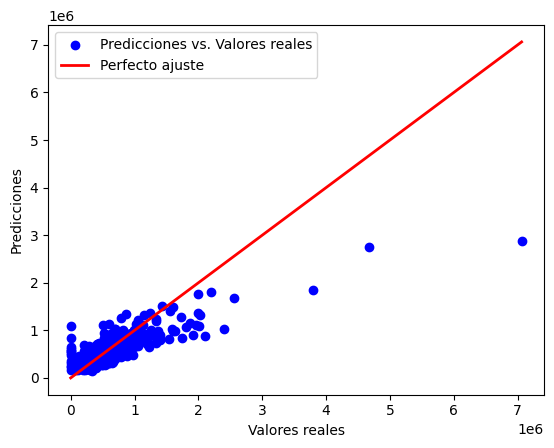

In [6]:
# Obtenemos solo las características numéricas

X = train_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = train_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

# Evaluar el modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Error cuadrático medio (entrenamiento): {mse_train:.4f}")

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Error cuadrático medio (prueba): {mse_test:.4f}")

# Graficamos predicciones vs valores reales en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones vs. Valores reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfecto ajuste')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


#Predicción con modelo lineal para Kaggle
y_test_lineal_kaggle = model.predict(test_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']])
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_lineal_kaggle})
predicciones.to_csv('Predicción_modelo_lineal.csv', index=False)


##### Modelo Polinomial


Error cuadrático medio (entrenamiento): 44322708804.2307
Error cuadrático medio (prueba): 6741016191825.0078


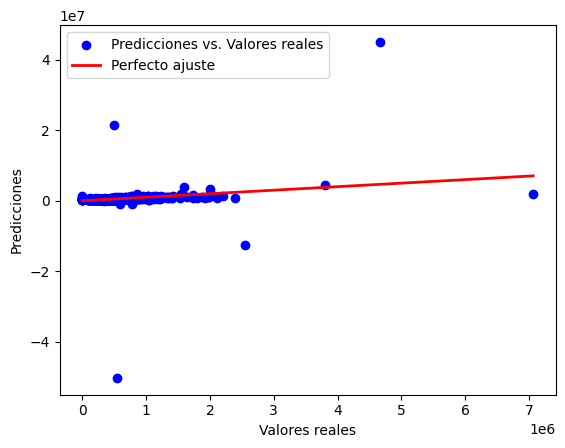

In [7]:
# Asumiendo que new_train_df es tu DataFrame
# Extraer características y objetivo del DataFrame
X = train_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = train_df['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear un objeto PolynomialFeatures para agregar términos polinomiales
degree = 3
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear y ajustar el modelo de regresión lineal con características polinomiales
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Hacer predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train_poly)

# Hacer predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test_poly)

# Evaluar el modelo en el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Error cuadrático medio (entrenamiento): {mse_train:.4f}")

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Error cuadrático medio (prueba): {mse_test:.4f}")

# Visualizar las predicciones frente a los valores reales en el conjunto de prueba
plt.scatter(y_test, y_test_pred, color='blue', label='Predicciones vs. Valores reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfecto ajuste')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()

#Predicción con modelo polinomial para Kaggle
X = test_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
X=  poly.fit_transform(X)
y_test_pol_kaggle = model.predict(X)
predicciones2 = pd.DataFrame({'id':test_df['id'],'price':y_test_pol_kaggle})
predicciones2.to_csv('Predicción_modelo_pol.csv', index= False)


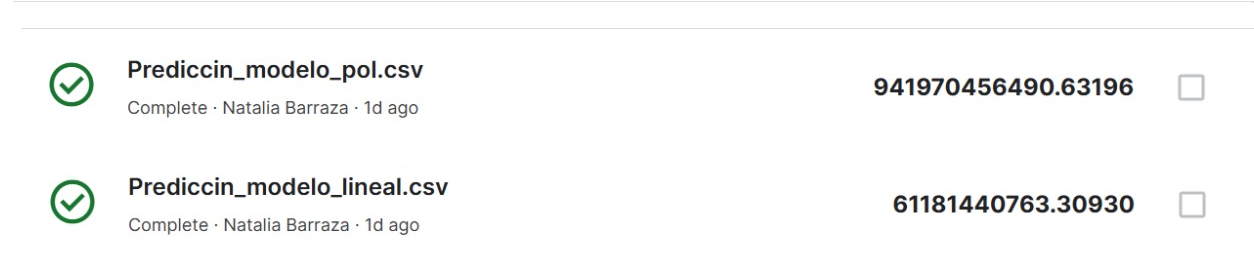

In [9]:
from IPython.display import Image
Image(filename='poli.png')


# Conclusión de los resultados
Podemos observar en los resultados para el dataset del concreto, el sintético que el error de entrenamiento y el error de predicción eran menores comparados a los del modelo lineal, y para los dataset de la calidad del vino y el de competencia obtuvimos que a pesar de tener menor error de entrenmiento el modelo polinomia era mayor. Así, vemos que en todos los casos, la regresión polinomial reduce el error de entrenamiento, pero puede llegaar a ocurrir que el error de predicción sea menor, como los primeros dos casos, o que el error de predicción sea mayor, como en los útlimos casos. Así ninguno de los 4 escenarios refuta nuestra hipótesis, así que, con la información reunida anteriormente, podemos decir que nuestra hipótesis es verdadera.

### PARTE 2: COMPETENCIA

### Librerías Importadas

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression
from datetime import datetime
import seaborn as sns; sns.set()
from matplotlib import rcParams
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

### Cargado y Análisis de Datos

In [11]:
train_df = pd.read_csv('house_price_train.csv')
test_df = pd.read_csv('house_price_test.csv')

#### Modificaciones a las características

In [12]:
new_train_df = train_df.copy()
new_train_df = new_train_df.drop('id', axis=1)

Nos quedamos solo con la fecha, sin la hora, y creamos las columnas 'año', 'mes' y 'día' para analizarlas

In [13]:
new_train_df.loc[:, 'date'] = new_train_df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
test_df.loc[:, 'date'] = test_df['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())

new_train_df.insert(2, 'year', new_train_df['date'].apply(lambda x: x.year))
new_train_df.insert(2, 'month', new_train_df['date'].apply(lambda x: x.month))
new_train_df.insert(2, 'day', new_train_df['date'].apply(lambda x: x.day))
test_df.insert(2, 'year', test_df['date'].apply(lambda x: x.year))
test_df.insert(2, 'month', test_df['date'].apply(lambda x: x.month))
test_df.insert(2, 'day', test_df['date'].apply(lambda x: x.day))

new_train_df = new_train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

print('Note que se analizan las ventas de un mismo año: ', new_train_df['year'].unique())

new_train_df = new_train_df.drop('year', axis = 1)
test_df = test_df.drop('year', axis = 1)

print('Además, el día es muy específico, (es muy corta la cantidad de tiempo) y no nos entrega información de la época en que se vende, pues los números de los días se repiten todos los meses. Así, nos quedaremos solo con el mes porque, como es uno el año a analizar, el mes nos entrega información')

new_train_df = new_train_df.drop('day', axis=1)
test_df = test_df.drop('day', axis = 1)

Note que se analizan las ventas de un mismo año:  [2014]
Además, el día es muy específico, (es muy corta la cantidad de tiempo) y no nos entrega información de la época en que se vende, pues los números de los días se repiten todos los meses. Así, nos quedaremos solo con el mes porque, como es uno el año a analizar, el mes nos entrega información


Note que todos quedan en el país USA, así que quitaremos esa columna. Además, el nombre de la calle es demasiado específico, por lo tanto, si le damos valores numéricos, el valor de cada registro sería diferente, por lo tanto, no entrega mucha información. Además, creemos que, statezip es suficiente para representar cada calle y ciudad, pues es un punto medio. Por lo anterior, nos quedaremos solo con la parte numérica de statezip pues todos empiezan con las mismas letras.

In [14]:
#Eliminamos la columna country, street y city
new_train_df = new_train_df.drop('country', axis=1)
new_train_df = new_train_df.drop('street', axis=1)
new_train_df = new_train_df.drop('city', axis=1)
test_df = test_df.drop('country', axis=1)
test_df = test_df.drop('street', axis=1)
test_df = test_df.drop('city', axis=1)

price = new_train_df['price']

#Definimos una nueva columna llamada zipcode solo con la información numérica de statezip. 
new_train_df['zipcode'] = new_train_df['statezip'].str.extract(r'(\d{5})')
new_train_df['zipcode'] = new_train_df['zipcode'].astype(int)
test_df['zipcode'] = test_df['statezip'].str.extract(r'(\d{5})')
test_df['zipcode'] = test_df['zipcode'].astype(int)

#Eliminamos la columna statezip
new_train_df = new_train_df.drop('statezip', axis=1)
test_df = test_df.drop('statezip', axis = 1)

new_train_df = new_train_df.drop('price', axis=1)
new_train_df['price'] = price

new_train_df['zipcode'] = new_train_df['zipcode'].astype(int)


Vemos la cantidad de veces que aparece un precio en el df

In [15]:
price_counts = train_df.sort_values(by='price')['price'].value_counts()
print(price_counts)

price
0.0          40
300000.0     35
400000.0     28
440000.0     25
475000.0     25
             ..
416286.0      1
415500.0      1
414000.0      1
413500.0      1
7062500.0     1
Name: count, Length: 1514, dtype: int64


Dado el contexto del problema, es raro que el valor de una vivienda sea 0, si se está ofreciendo a la venta, así que se para todos los modelos que ajustemos, se irán comparando los resultaods quitando esos registros y dejándolos.

In [16]:
new_train_df_sin_0 = (new_train_df[~(new_train_df['price'] == 0)])

#### Se definen los atributos que se tienen inicialmente.

In [17]:
atributos = list(new_train_df.columns)
atributos.remove('price')

#### Modelos (sin Ingeniería de Atributos)

##### Regresión Lineal

In [18]:
#Datos 
X = new_train_df[atributos]
y = new_train_df['price']

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

model_s0 = LinearRegression()
model_s0.fit(X_sin_0, y_sin_0)

y_test_pred = model.predict(X_test)
y_test_pred_s0 = model.predict(X_test_s0)

# Evaluar el modelo en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test_s0 =mean_squared_error(y_test_s0, y_test_pred_s0)
print(f"Error cuadrático medio (prueba) considerando los 0: {mse_test:.4f}")
print(f"Error cuadrático medio (prueba) sin considerar los 0: {mse_test_s0:.4f}")

#Predecimos el test con el que tuvo mejor performance y generamos el archivo para subirlo a kaggle

model.fit(X,y)
y_test_kaggle = model.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción1.csv', index= False)

model_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = model_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción2.csv', index= False)

Error cuadrático medio (prueba) considerando los 0: 81378887074.2281
Error cuadrático medio (prueba) sin considerar los 0: 84645096862.9027


##### Lasso

In [19]:
X = new_train_df[atributos]
y = new_train_df['price']

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

# Escala las características
scaler = StandardScaler()
X_processed = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X = X_processed.copy()
y = new_train_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_sin_0 = X_sin_0_processed.copy()
y_sin_0 = new_train_df_sin_0['price']
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada
grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

# Mejor valor de alpha
print("Best alpha: ", grid.best_params_['alpha'])
print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

# Ajusta el modelo Lasso con el mejor valor de alpha
lasso_best = Lasso(alpha=grid.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train, y_train)

lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)
lasso_best_s0.fit(X_train_s0, y_train_s0)

# Haz predicciones y calcula el MSE
y_pred_best = lasso_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error with best alpha: ", mse_best)

y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

#Predigo el test
lasso_best.fit(X, y)
y_test_kaggle = lasso_best.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción3.csv', index= False)

lasso_best_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción4.csv', index= False)

Best alpha:  1.0
Best alpha sin considerar los 0:  0.47148663634573895
Mean Squared Error with best alpha:  81379421682.60559
Mean Squared Error with best alpha sin considerar los 0:  81014211693.76732


##### Adaptative Lasso

A priori, sabemos que la regularización de Lasso funciona mejor para problemas con alta dimensionalidad pues esta regularización tiene más dipersión. Específicamente, se utilizará Adaptative Lasso pues se encuentran los coeficientes más rápidos.

In [20]:
X = new_train_df[atributos]
y = new_train_df['price']

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

# Escala las características
scaler = StandardScaler()
X_processed = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X = X_processed.copy()
y = new_train_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_sin_0 = X_sin_0_processed.copy()
y_sin_0 = new_train_df_sin_0['price']
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

# Subclase para implementar Adaptive Lasso
class AdaptiveLasso(Lasso):
    def __init__(self, alpha=1.0, gamma=1.0, max_iter=1000, tol=1e-4):
        super().__init__(alpha=alpha, max_iter=max_iter, tol=tol)
        self.gamma = gamma

    def fit(self, X, y):
        super().fit(X, y)
        self.coef_ = self._adaptive_weights(self.coef_)
        return super().fit(X, y)

    def _adaptive_weights(self, coef_):
        weights = 1 / (np.abs(coef_) ** self.gamma + 1e-8)
        return weights

# Define el rango de valores para alpha
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada utilizando Lasso estándar
grid = GridSearchCV(Lasso(max_iter=1000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

grid_s0 = GridSearchCV(Lasso(max_iter=1000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

# Mejor valor de alpha
best_alpha = grid.best_params_['alpha']
print("Best alpha: ", best_alpha)

best_alpha_s0 = grid_s0.best_params_['alpha']
print("Best alpha sin considerar los 0: ", best_alpha_s0)

# Crea una instancia de Adaptive Lasso con el mejor valor de alpha
adaptive_lasso = AdaptiveLasso(alpha=best_alpha, gamma=1.0, max_iter=10000)
adaptive_lasso_s0 = AdaptiveLasso(alpha=best_alpha_s0, gamma=1.0, max_iter=10000)


# Ajusta el modelo en el conjunto de entrenamiento
adaptive_lasso.fit(X_train, y_train)

adaptive_lasso_s0.fit(X_train_s0, y_train_s0)

# Haz predicciones en el conjunto de prueba
y_pred = adaptive_lasso.predict(X_test)
# Calcula el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Adaptive Lasso: ", mse)

y_pred_s0 = adaptive_lasso_s0.predict(X_test_s0)
mse_s0 = mean_squared_error(y_test_s0, y_pred_s0)
print("Mean Squared Error with Adaptive Lasso sin considerar los 0: ", mse_s0)

#Se predice el que tuvo mejor performance

#Predigo el test
adaptive_lasso.fit(X, y)
y_test_kaggle = adaptive_lasso.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción5.csv', index= False)

adaptive_lasso_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = adaptive_lasso_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción6.csv', index= False)

Best alpha:  1.0
Best alpha sin considerar los 0:  1.0
Mean Squared Error with Adaptive Lasso:  81379421682.60559
Mean Squared Error with Adaptive Lasso sin considerar los 0:  81014447130.22498


#### Ingeniería de Atributos. Vemos que de los 3 anteriores, adaptative lasso eliminando los registros 0 da una mejor performance, así que todos los cambios que hagamos de ahora en adeltante será en esa base


Es lógico pensar que a más grande sea una casa, mayor será su valor, así que podriamos sumar las columnas relacionadas al área de las distintas zonas de la casa

In [21]:
new_train_df_sin_0['sqft_sum'] = new_train_df_sin_0['sqft_living'] + new_train_df_sin_0['sqft_lot'] + new_train_df_sin_0['sqft_above'] + new_train_df_sin_0['sqft_basement']
X_sin_0 = new_train_df_sin_0[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_sum']]
y_sin_0 =new_train_df_sin_0['price']

X_test_kaggle = test_df.copy()
X_test_kaggle['sqft_sum'] = X_test_kaggle['sqft_living'] + X_test_kaggle['sqft_lot'] + X_test_kaggle['sqft_above'] + X_test_kaggle['sqft_basement']
X_test_kaggle = X_test_kaggle[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_sum']]


# Escala las características
scaler = StandardScaler()
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X_sin_0 = X_sin_0_processed.copy()
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)
lasso_best_s0.fit(X_train_s0, y_train_s0)

y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

#Predigo el test
lasso_best_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción7.csv', index= False)
new_train_df_sin_0=new_train_df_sin_0.drop(columns=['sqft_sum'], axis=1)

Best alpha sin considerar los 0:  0.0001
Mean Squared Error with best alpha sin considerar los 0:  119623923986.53769


Calculemos la matriz de correlación de Pearson

In [22]:
import pandas as pd

correlation_matrix = new_train_df_sin_0.corr()

print(correlation_matrix)

relevant_features = correlation_matrix[abs(correlation_matrix) > 0.3] 

print(relevant_features)

no_relevant_features = correlation_matrix[abs(correlation_matrix) < 0.3] 

print(no_relevant_features)

               bedrooms     month  bathrooms  sqft_living  sqft_lot    floors  \
bedrooms       1.000000  0.020662   0.542806     0.602712  0.071735  0.177680   
month          0.020662  1.000000   0.035502     0.051446 -0.009036  0.028315   
bathrooms      0.542806  0.035502   1.000000     0.759083  0.094961  0.487894   
sqft_living    0.602712  0.051446   0.759083     1.000000  0.186451  0.348619   
sqft_lot       0.071735 -0.009036   0.094961     0.186451  1.000000 -0.001615   
floors         0.177680  0.028315   0.487894     0.348619 -0.001615  1.000000   
waterfront     0.001416 -0.000655   0.075902     0.123632  0.021091  0.017076   
view           0.121886 -0.014222   0.209809     0.311780  0.045870  0.036962   
condition      0.026478  0.017711  -0.119851    -0.065679  0.004380 -0.269153   
sqft_above     0.487494  0.051881   0.682784     0.873840  0.193341  0.528864   
sqft_basement  0.342389  0.010349   0.304732     0.448589  0.027735 -0.255777   
yr_built       0.139375  0.0

De lo anterior, notamos que las variables más relacionadas con el precio son: 'sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms' (del mayor a menor). Así que ajustaremos un modelo añadiendolos 1 a 1

In [23]:
añadir = ['sqft_living', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']

i=8
list=[]
for atributo_a_añ in añadir:
    
       list.append(atributo_a_añ)
       X_test_kaggle = test_df[list]

       X_sin_0 = new_train_df_sin_0[list]
       y_sin_0 = new_train_df_sin_0['price']

       # Escala las características
       scaler = StandardScaler()
       X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
       X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

       # Divide los datos en conjuntos de entrenamiento y prueba

       X_sin_0 = X_sin_0_processed.copy()
       X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

       X_test_kaggle = X_test_processed.copy()

       #Ajustamos Lasso
       param_grid = {'alpha': np.logspace(-4, 0, 50)}

       # Realiza una búsqueda en la cuadrícula con validación cruzada

       grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
       grid_s0.fit(X_train_s0, y_train_s0)

       print("Característica añadida:", atributo_a_añ)
       print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

       lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)
       lasso_best_s0.fit(X_train_s0, y_train_s0)

       y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
       mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
       print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

       #Predigo el test

       lasso_best_s0.fit(X_sin_0, y_sin_0)
       y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
       predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
       predicciones.to_csv(f'Predicción{i}.csv', index= False)
       i+=1

Característica añadida: sqft_living
Best alpha sin considerar los 0:  0.0001
Mean Squared Error with best alpha sin considerar los 0:  99174841102.18698
Característica añadida: sqft_above
Best alpha sin considerar los 0:  0.0001
Mean Squared Error with best alpha sin considerar los 0:  98991073600.99344
Característica añadida: bathrooms
Best alpha sin considerar los 0:  0.0001
Mean Squared Error with best alpha sin considerar los 0:  99873754551.03412
Característica añadida: view
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  94237990005.70198
Característica añadida: sqft_basement
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  94238185313.17017
Característica añadida: bedrooms
Best alpha sin considerar los 0:  0.3906939937054613
Mean Squared Error with best alpha sin considerar los 0:  90960140693.67996


Análogamente, las variables con menos importancia son 'yr_built', 'yr_renovated', 'month', 'condition', 'zipcode', 'sqft_lot', 'waterfront', 'floors' (de menos a más importancia). Así, le iremos sacando uno a uno en ese orden e iremos entrenando el modelo.

In [24]:
añadir = ['yr_built', 'yr_renovated', 'condition', 'zipcode', 'sqft_lot', 'waterfront', 'floors']

atributos_aux = atributos.copy()

for atributo_a_el in añadir:
    
       atributos_aux.remove(atributo_a_el)
       X_test_kaggle = test_df[atributos_aux]

       X_sin_0 = new_train_df_sin_0[atributos_aux]
       y_sin_0 = new_train_df_sin_0['price']

       # Escala las características
       scaler = StandardScaler()
       X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
       X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

       # Divide los datos en conjuntos de entrenamiento y prueba

       X_sin_0 = X_sin_0_processed.copy()
       X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

       X_test_kaggle = X_test_processed.copy()

       #Ajustamos Lasso
       param_grid = {'alpha': np.logspace(-4, 0, 50)}

       # Realiza una búsqueda en la cuadrícula con validación cruzada

       grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
       grid_s0.fit(X_train_s0, y_train_s0)

       print("Característica eliminada:", atributo_a_el)
       print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

       lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)
       lasso_best_s0.fit(X_train_s0, y_train_s0)

       y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
       mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
       print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

       #Predigo el test

       lasso_best_s0.fit(X_sin_0, y_sin_0)
       y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
       predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
       predicciones.to_csv(f'Predicción{i}.csv', index= False)
       atributos_aux.append(atributo_a_el)
       i+=1

print(i)


Característica eliminada: yr_built
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  84074036671.00993
Característica eliminada: yr_renovated
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  81155537408.87029
Característica eliminada: condition
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  81667091860.59088
Característica eliminada: zipcode
Best alpha sin considerar los 0:  0.47148663634573895
Mean Squared Error with best alpha sin considerar los 0:  81034063815.57048
Característica eliminada: sqft_lot
Best alpha sin considerar los 0:  0.6866488450042998
Mean Squared Error with best alpha sin considerar los 0:  81045459409.43759
Característica eliminada: waterfront
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  84528469425.36823
Característica eliminada: floors
Best alpha sin considerar los 0:  1.

Tambien notamos que las características que tienen mayor correlación (>0.67) son: sqft_above y sqft_living, bathroooms y sqft_living, bathrooms y sqft_above. De los pares, sacaremos el que tiene menos correlación con el precio. Es decir, sacaremos sqft_above, bathrooms y bathrooms.

In [25]:
atributos_aux = atributos.copy()

atributos_aux.remove('sqft_above')
atributos_aux.remove('bathrooms')
X_sin_0 = new_train_df_sin_0[atributos_aux]
y_sin_0 = new_train_df_sin_0['price']
X_test_kaggle = test_df[atributos_aux]

# Escala las características
scaler = StandardScaler()
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X_sin_0 = X_sin_0_processed.copy()
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)
lasso_best_s0.fit(X_train_s0, y_train_s0)

y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

#Predigo el test

lasso_best_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción23.csv', index= False)

Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  79922816872.82703


Selector RFE

In [26]:
from sklearn.feature_selection import RFE

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

# Escala las características
scaler = StandardScaler()
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X_sin_0 = X_sin_0_processed.copy()
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)

# Crear el selector RFE
selector = RFE(lasso_best_s0, n_features_to_select=5)  # Seleccionar las 5 características más importantes

# Ajustar el selector a los datos
selector = selector.fit(X_train_s0, y_train_s0)

# Mostrar las características seleccionadas
print(X_sin_0.columns[selector.support_])

#Ajustamos modelo de regresión
lasso_best_s0.fit(X_train_s0, y_train_s0)

y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
print("RFE: Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

#Predigo el test

lasso_best_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv(f'Predicción{24}.csv', index= False)

Best alpha sin considerar los 0:  0.47148663634573895
Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'yr_built'], dtype='object')
RFE: Mean Squared Error with best alpha sin considerar los 0:  81014211693.76732


In [27]:
import pandas as pd
from skrebate import ReliefF

X = new_train_df[atributos]
y = new_train_df['price']

# Paso 3: Aplicar el algoritmo RELIEF
relief = ReliefF(n_neighbors=100)  # Ajusta los parámetros según sea necesario
relief.fit(X.values, y.values)

# Paso 4: Obtener las características seleccionadas
feature_scores = relief.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Filtrar las top N características más relevantes (por ejemplo, top 10)
top_n = 5
top_features = feature_importance_df['Feature'][:top_n]
print(top_features)

X = X[top_features]
X_test_kaggle = test_df[top_features]

# Escala las características
scaler = StandardScaler()
X_processed = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X = X_processed.copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print("Best alpha sin considerar los 0: ", grid.best_params_['alpha'])

lasso_best = Lasso(alpha=grid.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train, y_train)

y_pred_best = lasso_best.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best)

#Predigo el test
y_test_kaggle = lasso_best.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción25.csv', index= False)

3    sqft_living
9     sqft_above
2      bathrooms
0       bedrooms
5         floors
Name: Feature, dtype: object
Best alpha sin considerar los 0:  1.0
Mean Squared Error with best alpha sin considerar los 0:  95988516162.94658


#### Información Mutua


In [28]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

def calculate_mutual_info(df, features):
    mutual_info_matrix = pd.DataFrame(index=features, columns=features)
    for feature1 in features:
        for feature2 in features:
            mi = mutual_info_regression(df[[feature1]], df[feature2])
            mutual_info_matrix.loc[feature1, feature2] = mi[0]
    return mutual_info_matrix

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

# Escala las características
scaler = StandardScaler()
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

# Divide los datos en conjuntos de entrenamiento y prueba

X_sin_0 = X_sin_0_processed.copy()
X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

X_test_kaggle = X_test_processed.copy()

# Calcular la matriz de información mutua
mutual_info_matrix = calculate_mutual_info(X_train_s0, atributos)


# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.expand_frame_repr', False)  # No cortar las columnas en líneas nuevas
pd.set_option('display.max_colwidth', None)  # No truncar el contenido de las columnas

# Mostrar la matriz de información mutua
print(mutual_info_matrix)

# Calcular la información mutua
mi = mutual_info_regression(X_train_s0, y_train_s0)

# Crear un DataFrame con las características y sus puntajes de información mutua
mi_df = pd.DataFrame({'Característica': X_train_s0.columns, 'Información_Mutua': mi})
mi_df = mi_df.sort_values(by='Información_Mutua', ascending=False)

print(mi_df)

# Filtrar las características con mayor información mutua (umbral determinado por ti)
umbral = 0.05 
caracteristicas_filtradas = mi_df[mi_df['Información_Mutua'] > umbral]['Característica']
print(caracteristicas_filtradas)

X_sin_0 = X_sin_0[caracteristicas_filtradas]
X_test_kaggle = X_test_kaggle[caracteristicas_filtradas]

X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid_s0 = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_s0.fit(X_train_s0, y_train_s0)

print("Best alpha sin considerar los 0: ", grid_s0.best_params_['alpha'])

lasso_best_s0 = Lasso(alpha=grid_s0.best_params_['alpha'], max_iter=10000)

#Ajustamos modelo de regresión
lasso_best_s0.fit(X_train_s0, y_train_s0)

y_pred_best_s0 = lasso_best_s0.predict(X_test_s0)
mse_best_s0 = mean_squared_error(y_test_s0, y_pred_best_s0)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best_s0)

#Predigo el test

lasso_best_s0.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best_s0.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción26.csv', index= False)


               bedrooms     month bathrooms sqft_living  sqft_lot    floors waterfront      view condition sqft_above sqft_basement  yr_built yr_renovated   zipcode
bedrooms       1.290588         0  0.187069    0.313864  0.072703  0.026429          0   0.01939  0.006465   0.198027       0.08154    0.0642     0.057875  0.070367
month          0.007878  1.015832  0.002946     0.02943         0  0.026303          0         0         0          0             0  0.008246            0  0.016996
bathrooms      0.209502  0.000403  2.207855    0.491696  0.050971   0.27048    0.00023  0.022605  0.046551   0.386877      0.137032   0.30329     0.093881  0.138532
sqft_living    0.320578  0.020417  0.483301    5.690066  0.141051  0.146787    0.01329  0.052288  0.017492    3.14837      0.315264  0.114023     0.006542  0.094726
sqft_lot       0.076681  0.000635  0.058587    0.139393  6.377817   0.11931   0.013196  0.017495  0.034902   0.136964      0.032222  0.325508     0.031757  0.467224
floors    

Relieff

In [29]:
import pandas as pd
from skrebate import ReliefF

X_sin_0 = new_train_df_sin_0[atributos]
y_sin_0 = new_train_df_sin_0['price']

X_test_kaggle = test_df[atributos]

# Escala las características
scaler = StandardScaler()
X_sin_0_processed = pd.DataFrame(scaler.fit_transform(X_sin_0), columns=X_sin_0.columns)
X_test_processed = pd.DataFrame(scaler.fit_transform(X_test_kaggle), columns=X_test_kaggle.columns)

X_sin_0 = X_sin_0_processed.copy()
X_test_kaggle = X_test_processed.copy()

X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

#Aplicar el algoritmo RELIEF
relief = ReliefF(n_neighbors=100)
relief.fit(X_train_s0.values, y_train_s0.values)

#Obtener las características seleccionadas
feature_scores = relief.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_s0.columns, 'Score': feature_scores})
feature_importance_df = feature_importance_df.sort_values(by='Score', ascending=False)

# Filtrar las top 5 características más relevantes
top_n = 5
top_features = feature_importance_df['Feature'][:top_n]
print(top_features)

X_sin_0 = X_sin_0[top_features]
X_test_kaggle = X_test_kaggle[top_features]

X_train_s0, X_test_s0, y_train_s0, y_test_s0 = train_test_split(X_sin_0, y_sin_0, test_size=0.2, random_state=0)

#Ajustamos Lasso
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# Realiza una búsqueda en la cuadrícula con validación cruzada

grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_s0, y_train_s0)

print("Best alpha sin considerar los 0: ", grid.best_params_['alpha'])

lasso_best = Lasso(alpha=grid.best_params_['alpha'], max_iter=10000)
lasso_best.fit(X_train_s0, y_train_s0)

y_pred_best = lasso_best.predict(X_test_s0)
mse_best = mean_squared_error(y_test_s0, y_pred_best)
print("Mean Squared Error with best alpha sin considerar los 0: ", mse_best)

#Predigo el test
lasso_best.fit(X_sin_0, y_sin_0)
y_test_kaggle = lasso_best.predict(X_test_kaggle)
predicciones = pd.DataFrame({'id':test_df['id'],'price':y_test_kaggle})
predicciones.to_csv('Predicción27.csv', index= False)

3    sqft_living
9     sqft_above
0       bedrooms
2      bathrooms
5         floors
Name: Feature, dtype: object
Best alpha sin considerar los 0:  0.0001
Mean Squared Error with best alpha sin considerar los 0:  95238013412.65758


Tablas:

In [31]:
from tabulate import tabulate
print('El Top 3 del MSE de los modelos sin ing. de atributos es: ')

Top_3 = {
    'Modelo': ['Regresión Lineal', 'Lasso', 'Adaptative Lasso'],
    'Tiene los registros 0': ['Sí', 'No', 'No'],
    'MSE': [81378887074.2281, 81014211693.76732, 81014447130.22498]
}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(Top_3)

# Mostrar el DataFrame
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False, stralign='center', numalign='center'))

print('El Top 3 utilizando el mejor modelo anterior haciendo ingeniería de atrbiutos es: ')

Top_3 = {
    'Modelo': ['Lasso', 'Lasso', 'Lasso'],
     'Tiene los registros 0': ['No', 'No', 'No'],
    "Eliminar": ['zipcode', 'bathrooms y sqft_above', "según RFE"],
    'MSE': [81034063815.57048, 79922816872.82703, 81014211693.76732]
}

# Convertir el diccionario en un DataFrame
df = pd.DataFrame(Top_3)

# Mostrar el DataFrame
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False, stralign='center', numalign='center'))

El Top 3 del MSE de los modelos sin ing. de atributos es: 
+------------------+-----------------------+-------------------+
|      Modelo      | Tiene los registros 0 |        MSE        |
+------------------+-----------------------+-------------------+
| Regresión Lineal |          Sí           | 81378887074.2281  |
|      Lasso       |          No           | 81014211693.76732 |
| Adaptative Lasso |          No           | 81014447130.22498 |
+------------------+-----------------------+-------------------+
El Top 3 utilizando el mejor modelo anterior haciendo ingeniería de atrbiutos es: 
+--------+-----------------------+------------------------+-------------------+
| Modelo | Tiene los registros 0 |        Eliminar        |        MSE        |
+--------+-----------------------+------------------------+-------------------+
| Lasso  |          No           |        zipcode         | 81034063815.57048 |
| Lasso  |          No           | bathrooms y sqft_above | 79922816872.82703 |
| L